<a href="https://colab.research.google.com/github/Nsimaar99/Kaggle-Project/blob/master/Cats_vs_Dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import os
import shutil
import zipfile

# Step 1: Upload kaggle.json
uploaded = files.upload()

# Step 2: Create .kaggle directory
os.makedirs('~/.kaggle', exist_ok=True)
shutil.move('kaggle.json', '~/.kaggle/kaggle.json')
os.chmod('~/.kaggle/kaggle.json', 600)

# Step 3: Install the Kaggle package
!pip install kaggle

# Step 4: Download the ASIRRA dataset
!kaggle datasets download -d alvarole/asirra-cats-vs-dogs-object-detection-dataset

# Step 5: Unzip the downloaded dataset
with zipfile.ZipFile('asirra-cats-vs-dogs-object-detection-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('asirra_dataset')

# Step 6: List the contents of the dataset folder
print(os.listdir('asirra_dataset'))

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/alvarole/asirra-cats-vs-dogs-object-detection-dataset
License(s): other
 95% 23.0M/24.2M [00:02<00:00, 15.7MB/s]
100% 24.2M/24.2M [00:02<00:00, 12.4MB/s]
['Asirra: cat vs dogs']


In [ ]:
data_dir = '/content/asirra_dataset'

In [ ]:
from torchvision import datasets, transforms
import torch

# Define transforms
train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor()])

test_transforms = transforms.Compose([transforms.Resize(255),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor()])

In [ ]:
# Load the full dataset
full_dataset = datasets.ImageFolder(data_dir, transform=train_transforms)

# Set the split ratio (e.g., 80% training, 20% testing)
train_size = int(0.8 * len(full_dataset))
test_size = len(full_dataset) - train_size

# Split the dataset
train_data, test_data = torch.utils.data.random_split(full_dataset, [train_size, test_size])

# Apply test transforms to the test data
test_data.dataset.transform = test_transforms

In [ ]:
# Create DataLoaders
trainloader = torch.utils.data.DataLoader(train_data, batch_size=32, shuffle=True)
testloader = torch.utils.data.DataLoader(test_data, batch_size=32)


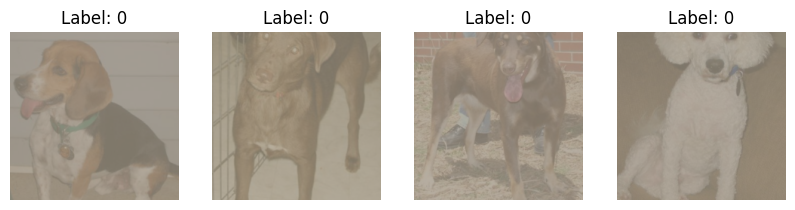

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Helper function to display a batch of images
def imshow(image, ax=None, title=None):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    # Undo preprocessing
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = std * image + mean
    image = np.clip(image, 0, 1)

    ax.imshow(image)
    if title:
        ax.set_title(title)
    ax.axis('off')

    return ax

# Visualize some training images
dataiter = iter(trainloader)
# Use next(dataiter) instead of dataiter.next()
images, labels = next(dataiter)

# Plot the images
fig, axes = plt.subplots(figsize=(10,10), ncols=4)
for i in range(4):
    ax = axes[i]
    imshow(images[i], ax=ax, title=f'Label: {labels[i].item()}')
plt.show()